##### This notebook is used to plot the distribution of pairs of parameters
In the first case, the number distribution for each parameter pair is plotted: a darker color indicates a greater number of systems that fall within the bin, defined by that value pair. Confirmed BH+MS are added to the plots, with associated error bars. 
In the second case, the plots from the previous point remain in the background, instead in the overlay is added a scatterplot of the same BH+MS systems, but which have been color coded through the `type` interaction they underwent when formed by a pair of stars. 

The purpose is to understand, given a pair of parameters of the system that is now in the BH+MS condition, what the possible channel of evolution of that system may have been before either body evolved into BH: CE, MT or NI.

In [1]:
# Importing packages

import numpy as np
import math as m
from scipy.spatial import ConvexHull

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
import itertools

import timeit

%matplotlib inline

pd.set_option('display.max_columns', None)
#sn.set_palette("pastel")

In [6]:
# Load files

# BH+MS database
file_int = pd.read_parquet('./data/sevn_output_Z0.01A1L1/int_binsys.parquet')
file_nint = pd.read_parquet('./data/sevn_output_Z0.01A1L1/non_int_binsys.parquet')

# Real data database (4 confirmed systems)
real_data = pd.read_parquet('./data/real_data.parquet')

# Interaction type database
type_df = pd.read_csv('./data/sevn_output_Z0.01A1L1/type/type_df.csv')

bwt = pd.read_parquet('./data/sevn_output_Z0.01A1L1/df_bwt.parquet')

In [7]:
file_nint.tail(10)

ID               name     Mass_0  MHE_0  MCO_0  Radius_0  RHE_0   
218045  933109  0_116269807422399  29.287180    0.0    0.0  0.000124    0.0  \
218320  933129  0_810873351414231  20.489000    0.0    0.0  0.000087    0.0   
218428  933137  0_404457532291907  13.902600    0.0    0.0  0.000059    0.0   
218486  933141  0_560096302193912  22.385240    0.0    0.0  0.000095    0.0   
218487  933141  0_560096302193912  22.420110    0.0    0.0  0.000095    0.0   
218556  933146  0_860933608483194   7.481464    0.0    0.0  0.000032    0.0   
218557  933146  0_860933608483194   7.483689    0.0    0.0  0.000032    0.0   
218944  933176  0_959328809051248  28.480180    0.0    0.0  0.000121    0.0   
219812  933243  0_174462992539636  20.132570    0.0    0.0  0.000085    0.0   
221024  933333  0_679432517052656  14.661950    0.0    0.0  0.000062    0.0   

        RCO_0  Luminosity_0  Temperature_0  Lambda_0  Phase_0  PhaseBSE_0   
218045    0.0  1.000000e-10       1637.000       NaN        7        14.0  \
218320    0.0  1.000000e-10       1957.163       NaN        7        14.0   
218428    0.0  1.000000e-10       2375.962       NaN        7        14.0   
218486    0.0  1.000000e-10       1872.434       NaN        7        14.0   
218487    0.0  1.000000e-10       1870.978       NaN        7        14.0   
218556    0.0  1.000000e-10       3238.875       NaN        7        14.0   
218557    0.0  1.000000e-10       3238.393       NaN        7        14.0   
218944    0.0  1.000000e-10       1660.031       NaN        7        14.0   
219812    0.0  1.000000e-10       1974.412       NaN        7        14.0   
221024    0.0  1.000000e-10       2313.618       NaN        7        14.0   

        RemnantType_0    Zams_0    Mass_1  MHE_1  MCO_1    Radius_1  RHE_1   
218045              6  45.84113  29.88802    0.0    0.0   10.706040    0.0  \
218320              6  42.16400  12.27492    0.0    0.0    4.696199    0.0   
218428              6  20.99941  21.71303    0.0    0.0    7.955467    0.0   
218486              6  34.54561  47.25368    0.0    0.0   31.275720    0.0   
218487              6  34.54561  40.37604    0.0    0.0  182.926100    0.0   
218556              6  10.97220  33.97683    0.0    0.0   35.490900    0.0   
218557              6  10.97220  33.74358    0.0    0.0   39.272980    0.0   
218944              6  44.47767  32.31217    0.0    0.0   12.165980    0.0   
219812              6  24.65100  21.36253    0.0    0.0   16.772050    0.0   
221024              6  22.18416  14.81684    0.0    0.0    5.246191    0.0   

        RCO_1  Luminosity_1  Temperature_1  Lambda_1  Phase_1  PhaseBSE_1   
218045    0.0     191046.20       36880.50       NaN        1         1.0  \
218320    0.0      13265.34       28584.65       NaN        1         1.0   
218428    0.0      82164.07       34646.89       NaN        1         1.0   
218486    0.0     643348.50       29230.38       NaN        1         1.0   
218487    0.0     700406.70       12346.00       NaN        1         1.0   
218556    0.0     376801.70       24004.70       NaN        1         1.0   
218557    0.0     383204.70       22915.92       NaN        1         1.0   
218944    0.0     238778.60       36580.70       NaN        1         1.0   
219812    0.0     124876.70       26494.39       NaN        1         1.0   
221024    0.0      23034.46       31045.53       NaN        1         1.0   

        RemnantType_1    Zams_1    Semimajor  Eccentricity        GWtime   
218045              0  30.53500   8098.19600      0.344690  7.899538e+12  \
218320              0  12.26200  28139.51000      0.275828  8.581308e+15   
218428              0  21.90459    774.02930      0.014039  5.011228e+09   
218486              0  51.91834    383.39410      0.007180  4.404876e+07   
218487              0  51.91834    398.79890      0.000000  6.683502e+07   
218556              0  36.24764     75.19402      0.012060  4.554129e+05   
218557              0  36.24764     71.03921      0.000

In [8]:
# Restrict data to T, P, M, e, a, L

restr_data_int = file_int[['ID', 'name', 'Radius_0', 'Mass_0', 'Temperature_0', 'Luminosity_0', 'Radius_1', 'Mass_1', 'Temperature_1', 'Luminosity_1', 'Eccentricity', 'Period', 'logP', 'Semimajor', 'BWorldtime']]
restr_data_nint = file_nint[['ID', 'name', 'Radius_0', 'Mass_0', 'Temperature_0', 'Luminosity_0', 'Radius_1', 'Mass_1', 'Temperature_1', 'Luminosity_1', 'Eccentricity', 'Period', 'logP', 'Semimajor', 'BWorldtime']]

# Rename *_0 as *_BH

restr_data_int = restr_data_int.rename(columns={'Radius_0': 'Radius_BH', 'Mass_0': 'Mass_BH', 'Temperature_0': 'Temperature_BH', 'Luminosity_0': 'Luminosity_BH'})
restr_data_nint = restr_data_nint.rename(columns={'Radius_0': 'Radius_BH', 'Mass_0': 'Mass_BH', 'Temperature_0': 'Temperature_BH', 'Luminosity_0': 'Luminosity_BH'})

# merging the BH+MS database with the type database
restr_data_nint = restr_data_nint.merge(type_df, on=['name'], how='left')

restr_data_nint = restr_data_nint.merge(bwt[['ID', 'name', 'elapsed_bwt']], on=['ID','name'], how='left')

# removing unwanted column
restr_data_nint = restr_data_nint.drop(columns=['Unnamed: 0'])

# Uncomment to keep just 1 row per system
#restr_data_nint = restr_data_nint.drop_duplicates(subset=['ID', 'name'], keep='first')

#print(np.shape(file_nint))
#print(restr_data_nint['type'].value_counts())

In [9]:
# Removing duolicated line for the same id, jff

dupl_int = restr_data_int.drop_duplicates(subset=['ID'], keep='first')
dupl_nint = restr_data_nint.drop_duplicates(subset=['ID'], keep='first')

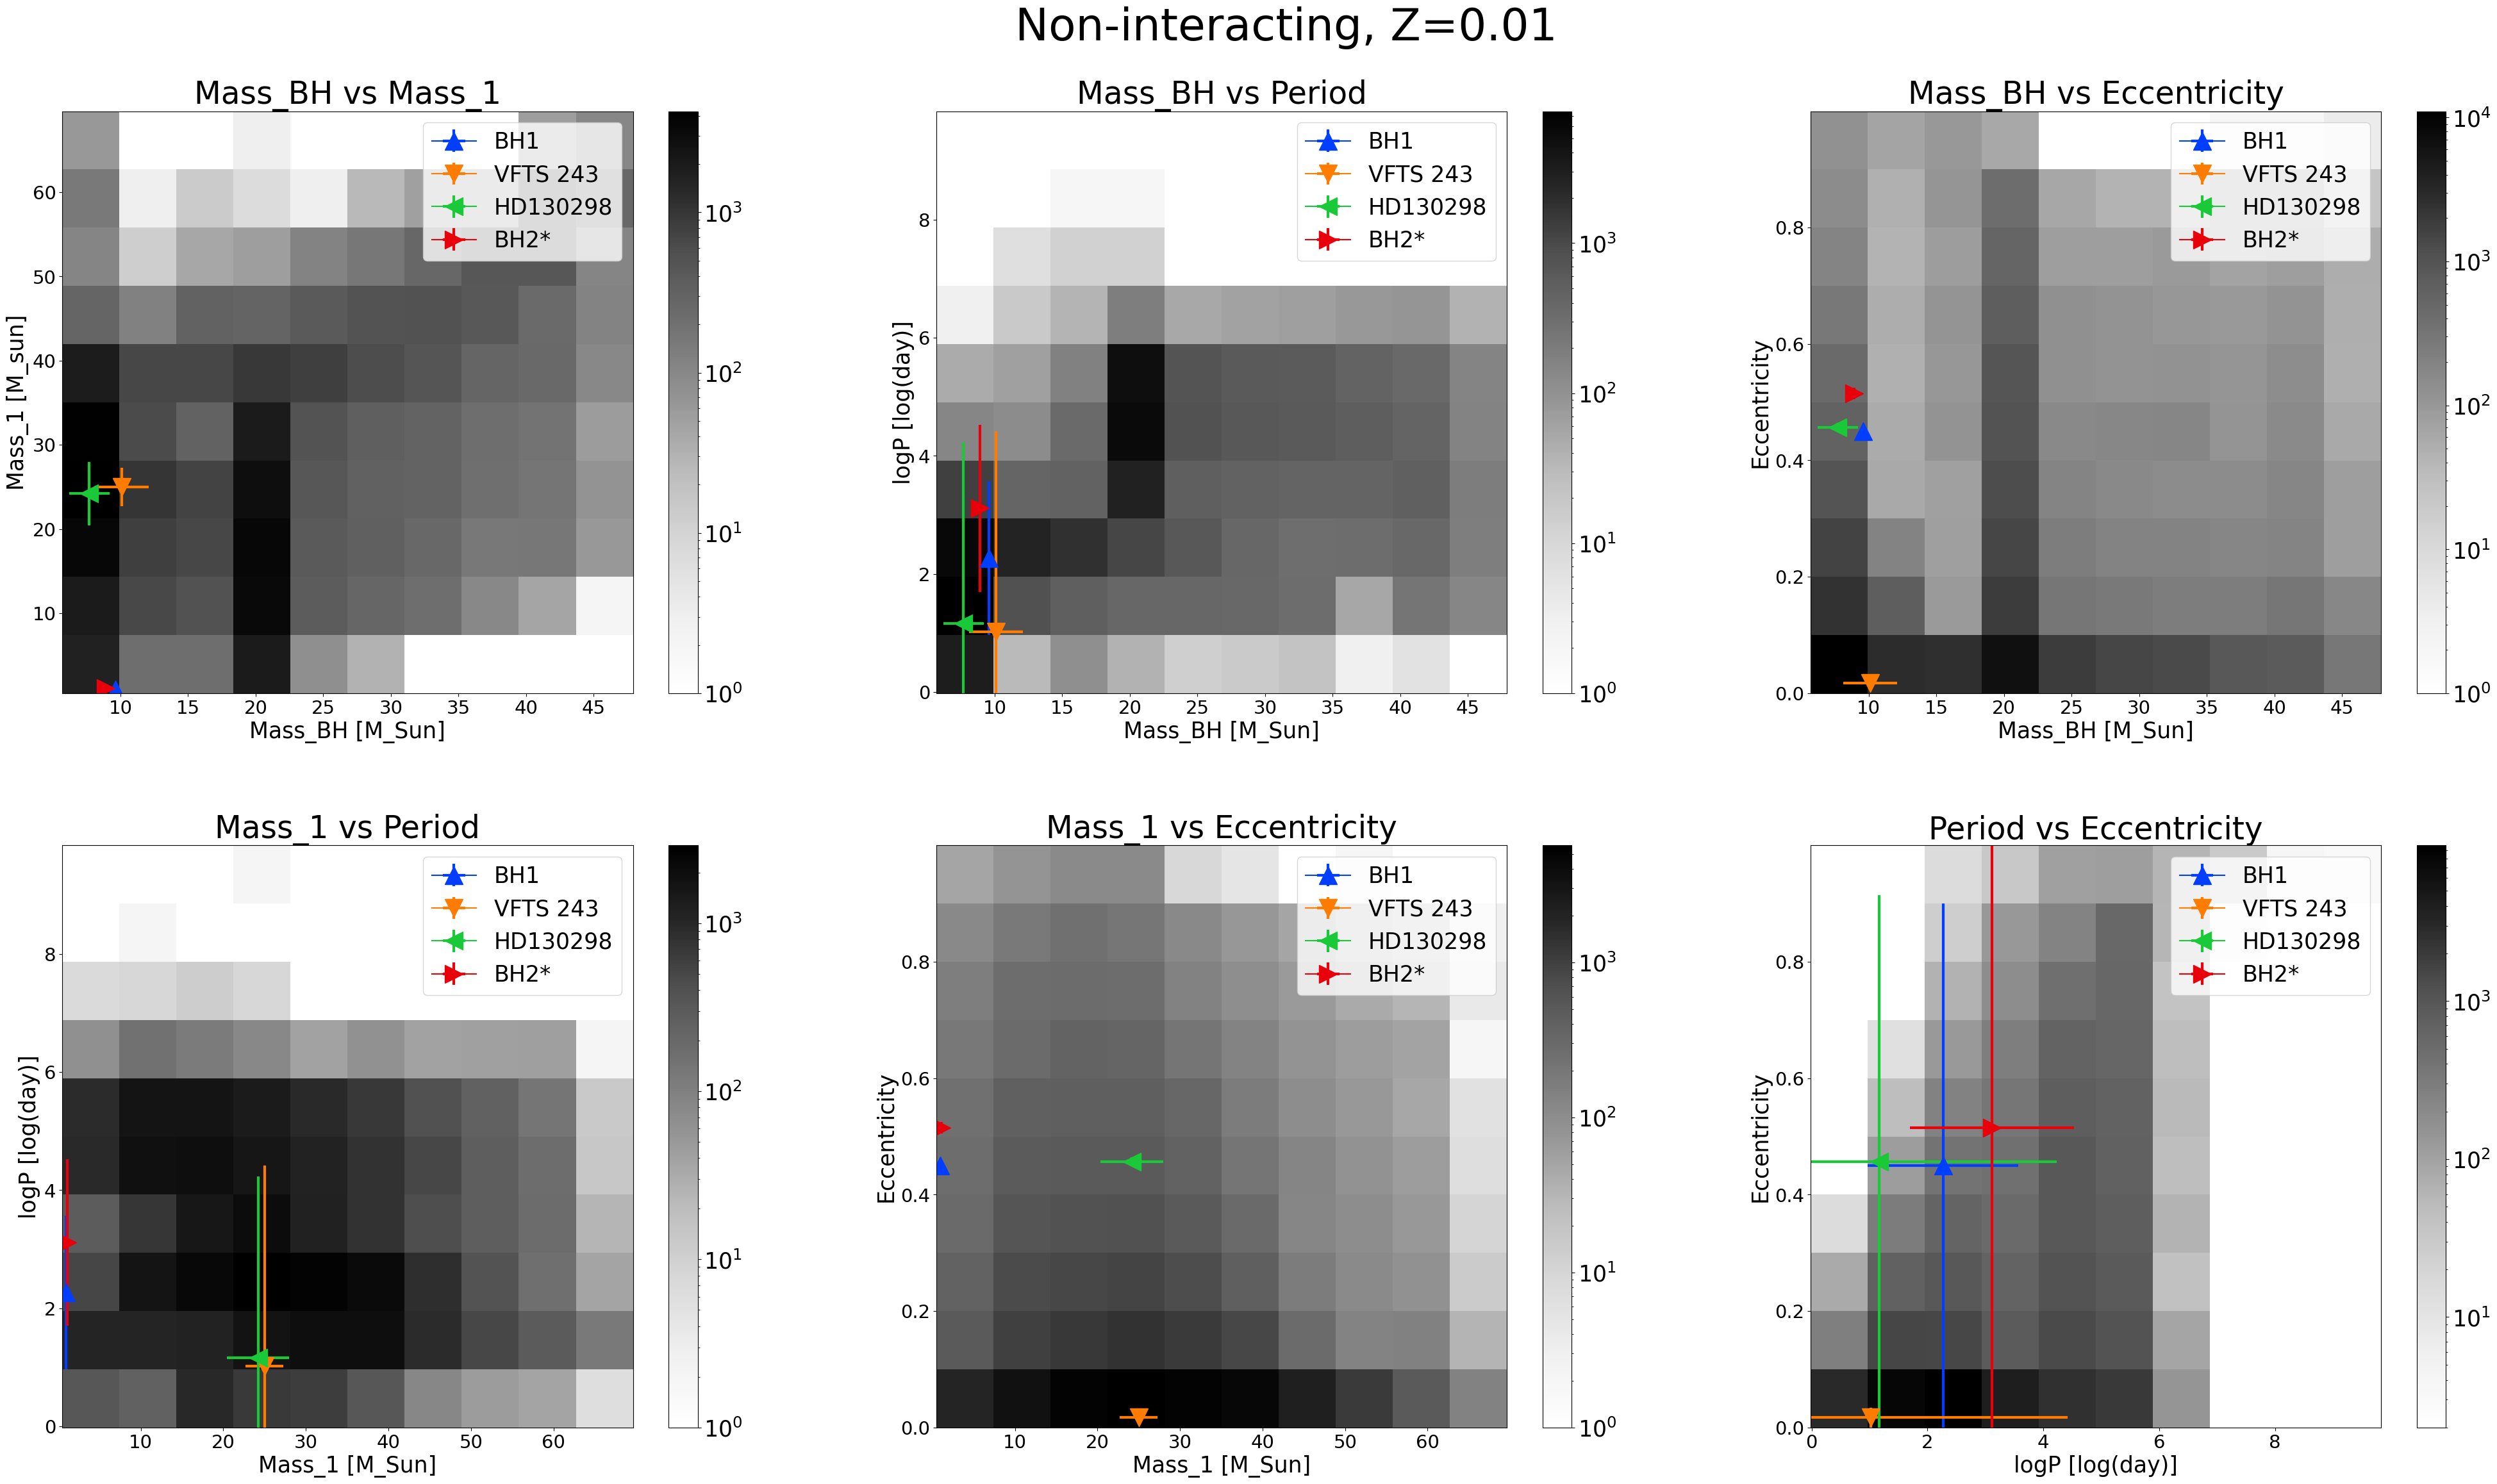

In [10]:
# Plotting 2D histograms for each pair of parameters.
# Superimposing the 4 real data w/ errorbars

sn.set_palette('bright')
fig, ax = plt.subplots(2,3, figsize=(43,25))
fig.tight_layout(pad=15.0)

fig.suptitle('Non-interacting, Z=0.01', fontsize=50)

for i in range(2):
    for j in range(3):
        ax[i,j].tick_params(labelsize=21)
        ax[i,j].xaxis.label.set_size(25)
        ax[i,j].yaxis.label.set_size(25)
        
marker = itertools.cycle(('^', 'v', '<', '>'))

plt.sca(ax[0,0])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['Mass_1'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,0]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['Mass_1'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = real_data[real_data['name']==i]['dMass_1'], color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('Mass_1 [M_sun]')
plt.title('Mass_BH vs Mass_1', fontsize=35)

plt.sca(ax[0,1])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['logP'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,1]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['logP'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = abs(real_data[real_data['name']==i]['dlogP']), color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('logP [log(day)]')
plt.title('Mass_BH vs Period', fontsize=35)

plt.sca(ax[0,2])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,2]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['Eccentricity'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = real_data[real_data['name']==i]['dEccentricity'], color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('Eccentricity')
plt.title('Mass_BH vs Eccentricity', fontsize=35)

plt.sca(ax[1,0])
plt.hist2d(restr_data_nint['Mass_1'], restr_data_nint['logP'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,0]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_1'], real_data[real_data['name']==i]['logP'], xerr = real_data[real_data['name']==i]['dMass_1'], yerr = abs(real_data[real_data['name']==i]['dlogP']), color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('Mass_1 [M_Sun]')
plt.ylabel('logP [log(day)]')
plt.title('Mass_1 vs Period', fontsize=35)

plt.sca(ax[1,1])
plt.hist2d(restr_data_nint['Mass_1'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,1]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_1'], real_data[real_data['name']==i]['Eccentricity'], xerr = real_data[real_data['name']==i]['dMass_1'], yerr = real_data[real_data['name']==i]['dEccentricity'], color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('Mass_1 [M_Sun]')
plt.ylabel('Eccentricity')
plt.title('Mass_1 vs Eccentricity', fontsize=35)

plt.sca(ax[1,2])
plt.hist2d(restr_data_nint['logP'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,2]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['logP'], real_data[real_data['name']==i]['Eccentricity'], xerr = abs(real_data[real_data['name']==i]['dlogP']), yerr = real_data[real_data['name']==i]['Eccentricity'], color=color, marker=next(marker), label=i, markersize=20, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
plt.xlabel('logP [log(day)]')
plt.ylabel('Eccentricity')
plt.title('Period vs Eccentricity', fontsize=35)

plt.show()

# Uncomment the next line if you what to save the figure
#fig.savefig('./images/non_int_Z0.0001.png')

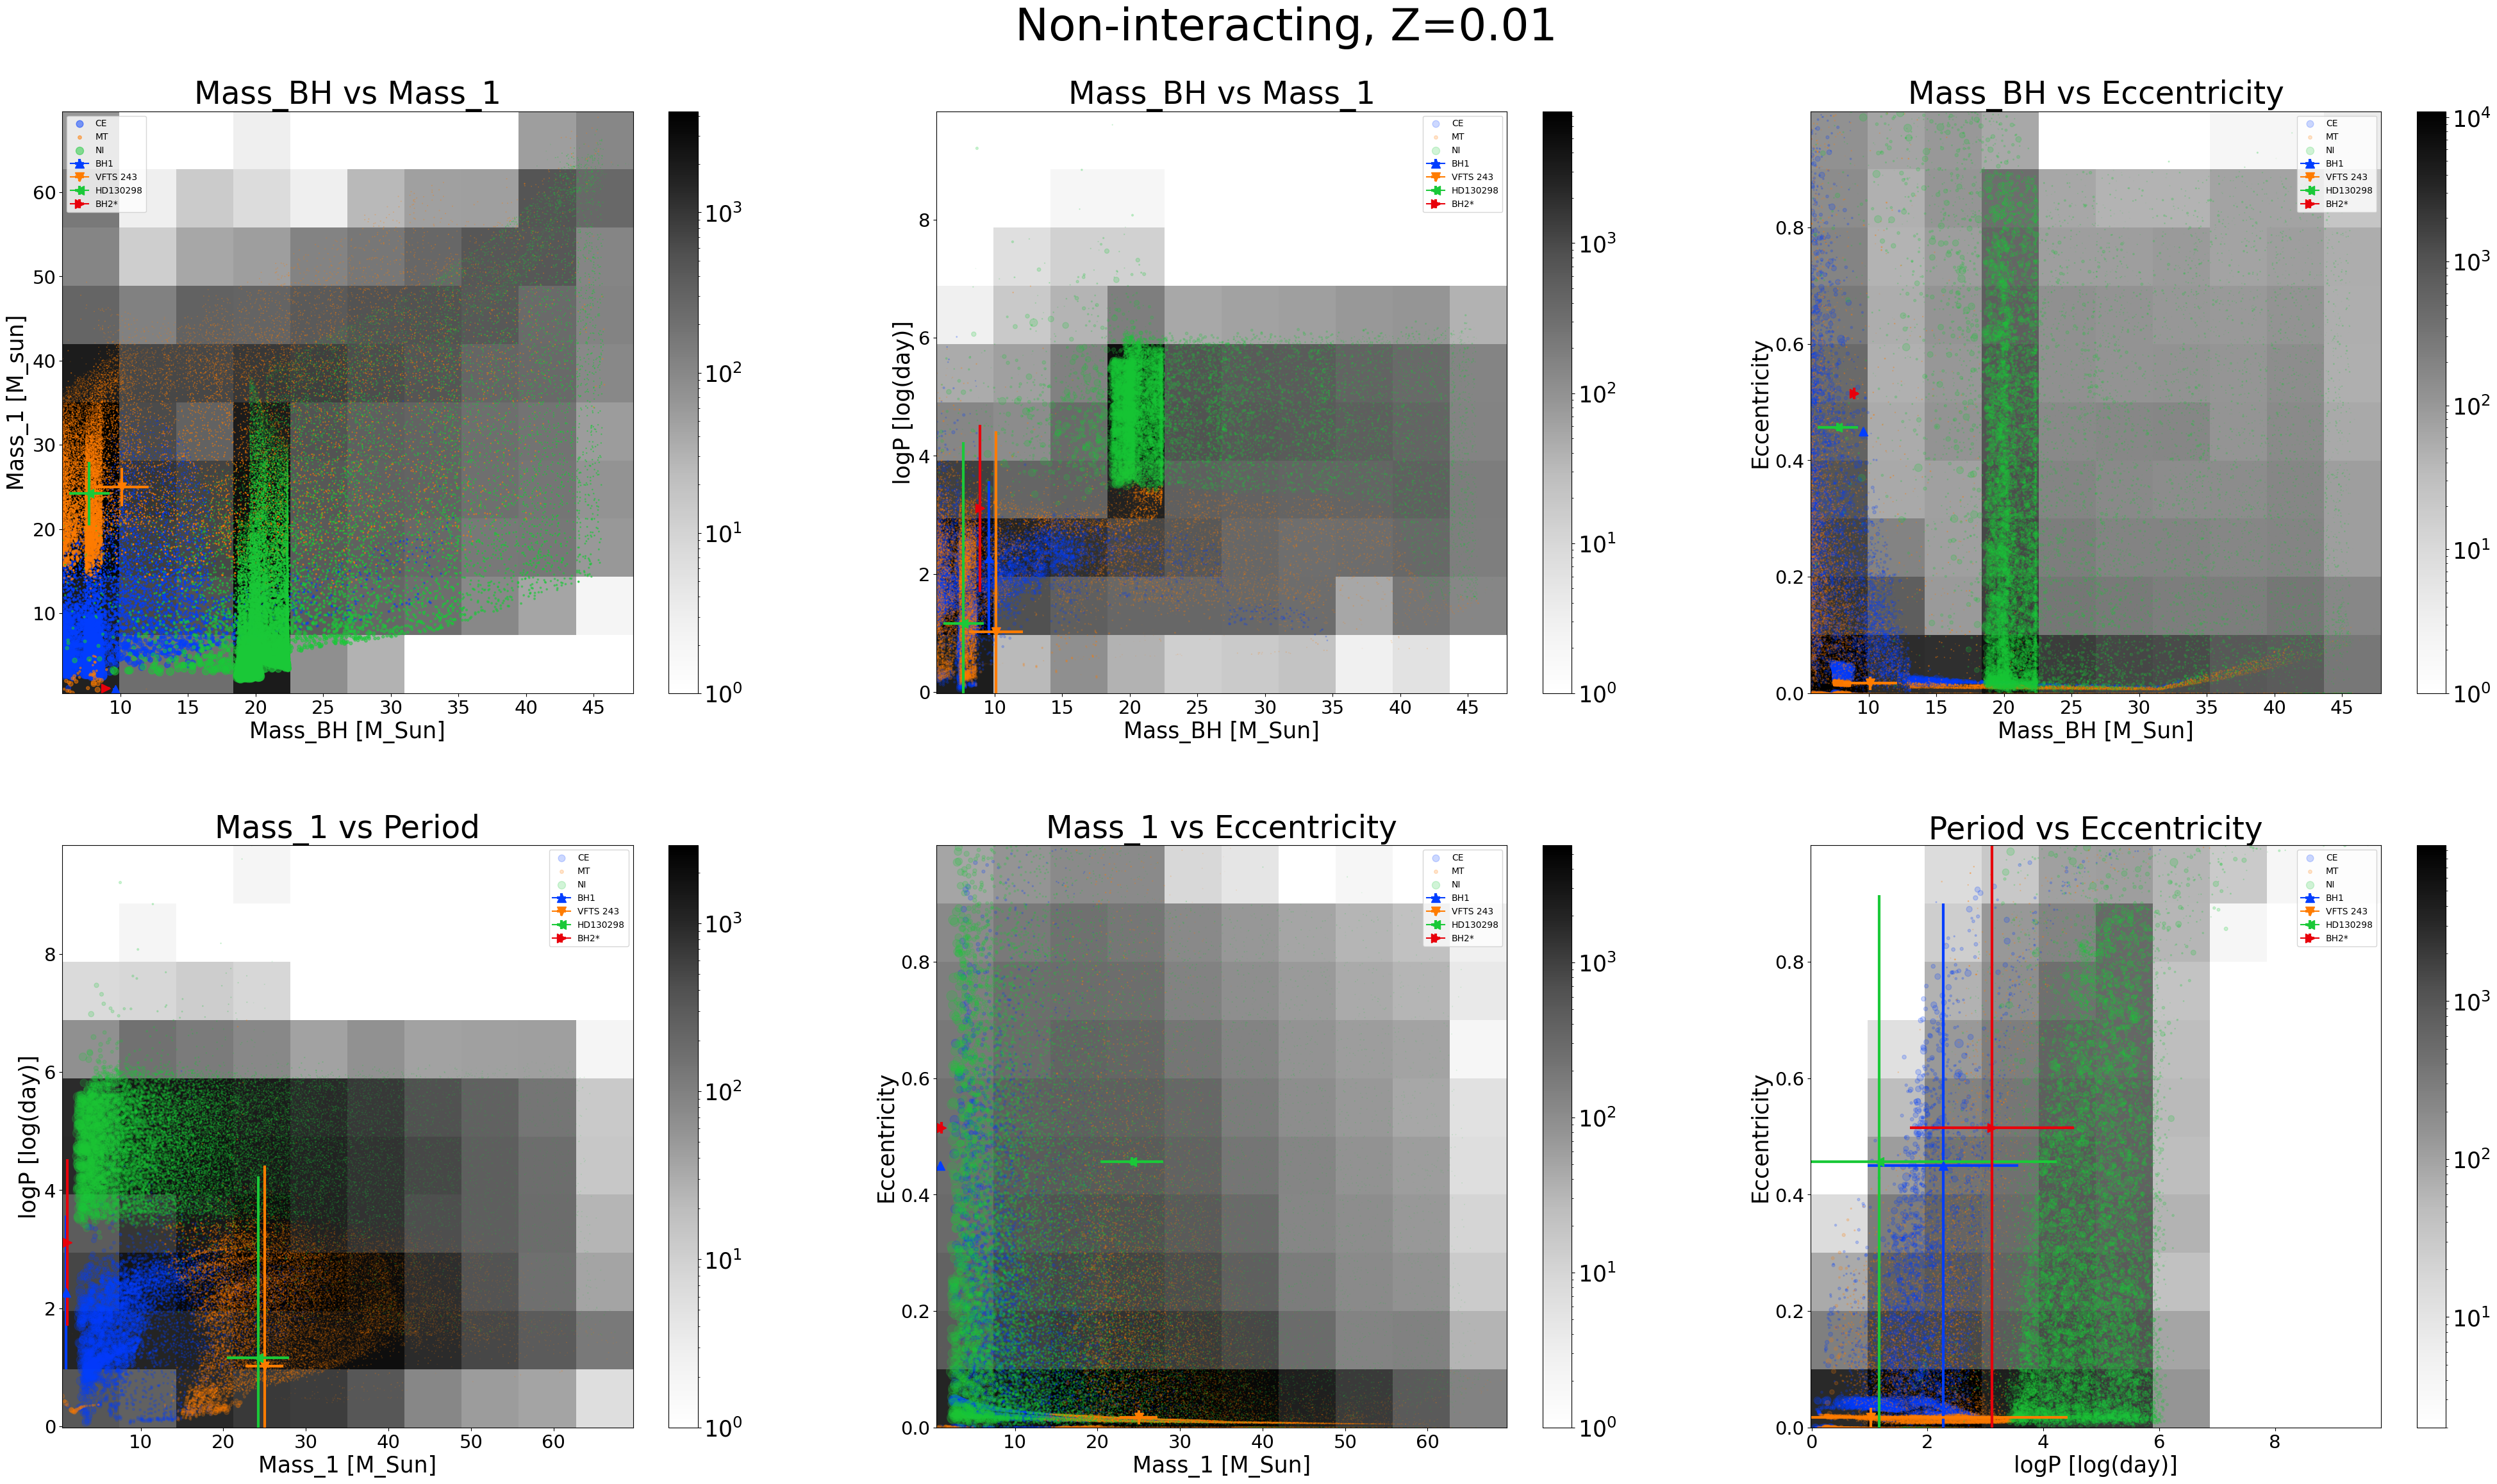

In [11]:
# Same plots as before.
# Superimposed scatter plots differentiating BH+MS sys based on their past evolution

sn.set_palette('bright')
fig, ax = plt.subplots(2,3, figsize=(43,25))
fig.tight_layout(pad=15.0)

fig.suptitle('Non-interacting, Z=0.01', fontsize=50)

for i in range(2):
    for j in range(3):
        ax[i,j].tick_params(labelsize=21)
        ax[i,j].xaxis.label.set_size(25)
        ax[i,j].yaxis.label.set_size(25)
        
marker = itertools.cycle(('^', 'v', '<', '>'))

groups = restr_data_nint.groupby('type')

plt.sca(ax[0,0])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['Mass_1'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,0]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['Mass_1'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = real_data[real_data['name']==i]['dMass_1'], color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.Mass_BH, group.Mass_1, marker='.', alpha=0.5, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('Mass_1 [M_sun]')
plt.title('Mass_BH vs Mass_1', fontsize=35)

plt.sca(ax[0,1])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['logP'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,1]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['logP'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = abs(real_data[real_data['name']==i]['dlogP']), color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.Mass_BH, group.logP, marker='.', alpha=0.2, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('logP [log(day)]')
plt.title('Mass_BH vs Mass_1', fontsize=35)

plt.sca(ax[0,2])
plt.hist2d(restr_data_nint['Mass_BH'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[0,2]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_BH'], real_data[real_data['name']==i]['Eccentricity'], xerr = real_data[real_data['name']==i]['dMass_BH'], yerr = real_data[real_data['name']==i]['dEccentricity'], color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.Mass_BH, group.Eccentricity, marker='.', alpha=0.2, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('Mass_BH [M_Sun]')
plt.ylabel('Eccentricity')
plt.title('Mass_BH vs Eccentricity', fontsize=35)

plt.sca(ax[1,0])
plt.hist2d(restr_data_nint['Mass_1'], restr_data_nint['logP'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,0]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_1'], real_data[real_data['name']==i]['logP'], xerr = real_data[real_data['name']==i]['dMass_1'], yerr = abs(real_data[real_data['name']==i]['dlogP']), color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.Mass_1, group.logP, marker='.', alpha=0.2, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('Mass_1 [M_Sun]')
plt.ylabel('logP [log(day)]')
plt.title('Mass_1 vs Period', fontsize=35)

plt.sca(ax[1,1])
plt.hist2d(restr_data_nint['Mass_1'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,1]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['Mass_1'], real_data[real_data['name']==i]['Eccentricity'], xerr = real_data[real_data['name']==i]['dMass_1'], yerr = real_data[real_data['name']==i]['dEccentricity'], color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.Mass_1, group.Eccentricity, marker='.', alpha=0.2, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('Mass_1 [M_Sun]')
plt.ylabel('Eccentricity')
plt.title('Mass_1 vs Eccentricity', fontsize=35)

plt.sca(ax[1,2])
plt.hist2d(restr_data_nint['logP'], restr_data_nint['Eccentricity'], cmap='Greys', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
for i in ['BH1', 'VFTS 243', 'HD130298', 'BH2*']:    
    color = next(ax[1,2]._get_lines.prop_cycler)['color']    
    #plt.scatter(real_data[real_data['ID']==i]['Mass_BH'], real_data[real_data['ID']==i]['Period'], color=color, marker=next(marker), label=i, s=60)
    plt.errorbar(real_data[real_data['name']==i]['logP'], real_data[real_data['name']==i]['Eccentricity'], xerr = abs(real_data[real_data['name']==i]['dlogP']), yerr = real_data[real_data['name']==i]['Eccentricity'], color=color, marker=next(marker), label=i, markersize=10, elinewidth=3)
    plt.legend(loc='best', fontsize=25)
for name, group in groups:
    plt.scatter(group.logP, group.Eccentricity, marker='.', alpha=0.2, s=group.elapsed_bwt, label=name)
plt.legend()
plt.xlabel('logP [log(day)]')
plt.ylabel('Eccentricity')
plt.title('Period vs Eccentricity', fontsize=35)

plt.show()

# Uncomment the next line if you what to save the figure
#fig.savefig('./images/non_int_type_Z0.0001.png')